In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_wall_z_image(Z_val, fx, fy, cx, cy, szx, szy):
  Z = Z_val*np.ones((szy, szx), dtype=np.float32)
  return Z

def get_road_z_image(H_val, fx, fy, cx, cy, szx, szy):
  y = np.arange(szy).reshape(-1,1)*1.
  y = np.tile(y, (1, szx))
  Z = np.zeros((szy, szx), dtype=np.float32)
  Z[y > cy] = H_val*fy / (y[y>cy]-cy)
  Z[y <= cy] = np.NaN
  return Z

def plot_optical_flow(ax, Z, u, v, cx, cy, szx, szy, s=16):
  # Here is a function for plotting the optical flow. Feel free to modify this 
  # function to work well with your inputs, for example if your predictions are
  # in a different coordinate frame, etc.
  
  x, y = np.meshgrid(np.arange(szx), np.arange(szy))
  ax.imshow(Z, alpha=0.5, origin='upper')
  q = ax.quiver(x[::s,::s], y[::s,::s], u[::s,::s], -v[::s, ::s])
  # ax.quiverkey(q, X=0.5, Y=0.9, U=20, 
  #              label='Quiver key length = 20', labelpos='N')
  ax.axvline(cx)
  ax.axhline(cy)
  ax.set_xlim([0, szx])
  ax.set_ylim([szy, 0])
  ax.axis('equal')

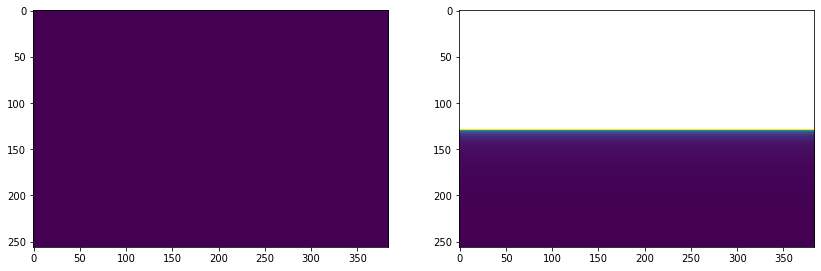

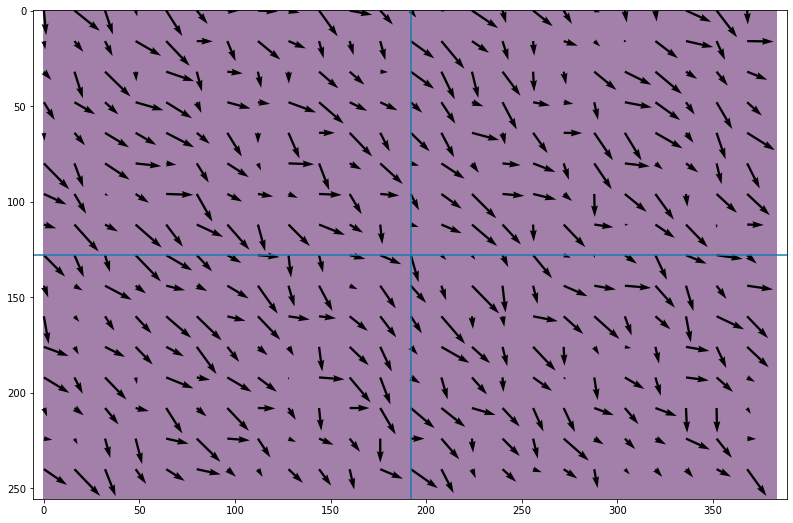

In [3]:
# Focal length along X and Y axis. In class we assumed the smae focal length 
# for X and Y axis. but in general they could be different. We are denoting 
# these by fx and fy.
fx = fy = 128.

# Size of the image
szy = 256
szx = 384

# Center of the image. We are going to assume that the principal point is at 
# the center of the image.
cx = 192
cy = 128

# Gets the image of a wall 2m in front of the camera.
Z1 = get_wall_z_image(2., fx, fy, cx, cy, szx, szy)


# Gets the image of the ground plane that is 3m below the camera.
Z2 = get_road_z_image(3., fx, fy, cx, cy, szx, szy)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
ax1.imshow(Z1)
ax2.imshow(Z2)

# Plotting function.
f = plt.figure(figsize=(13.5,9))
u = np.random.rand(*Z1.shape)
v = np.random.rand(*Z1.shape)
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=16)
f.savefig('optical_flow_output.pdf', bbox_inches='tight')

In [10]:
def findUV(t, omega, Z, fx, fy, szx, szy, cx, cy):
    xx, yy = np.meshgrid(np.arange(szx)-cx, np.arange(szy)-cy)
    tx, ty, tz = t
    ox, oy, oz = omega
    u = (- fx*tx + xx*tz) / Z + xx*yy*ox/fx - (fx + xx*xx/fx)*oy + yy*oz
    v = (- fy*ty + yy*tz) / Z + (fx + yy*yy/fy)*ox - xx*yy*oy/fy - xx*oz
    return u, v

def plot_required_part(t, o, Z, fx, fy, cx, cy, szx, szy, s=16):
    u, v = findUV(t, o, Z, fx, fy, szx, szy, cx, cy)
    f = plt.figure(figsize=(13.5,9))
    plot_optical_flow(f.gca(), Z, u, v, cx, cy, szx, szy, s=16)

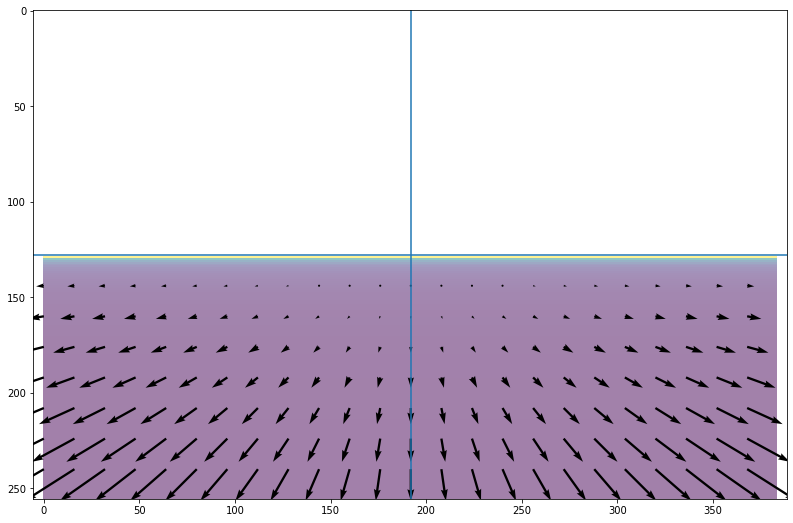

In [5]:
# part i
# if we are driving on a flat road
# the camera (human eyes) has pure translation and omega = 0
# translation velocity
t1 = [0, 0, 1]
o1 = [0, 0, 0]
plot_required_part(t1, o1, Z2, fx, fy, cx, cy, szx, szy)

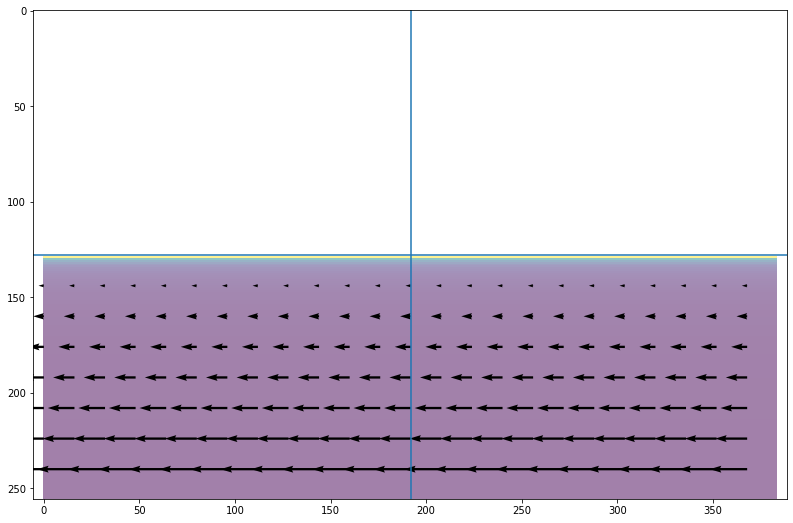

In [6]:
# part ii
# omega = 0, t = [1, 0, 0]
t2 = [1, 0, 0]
o2 = [0, 0, 0]
plot_required_part(t2, o2, Z2, fx, fy, cx, cy, szx, szy)

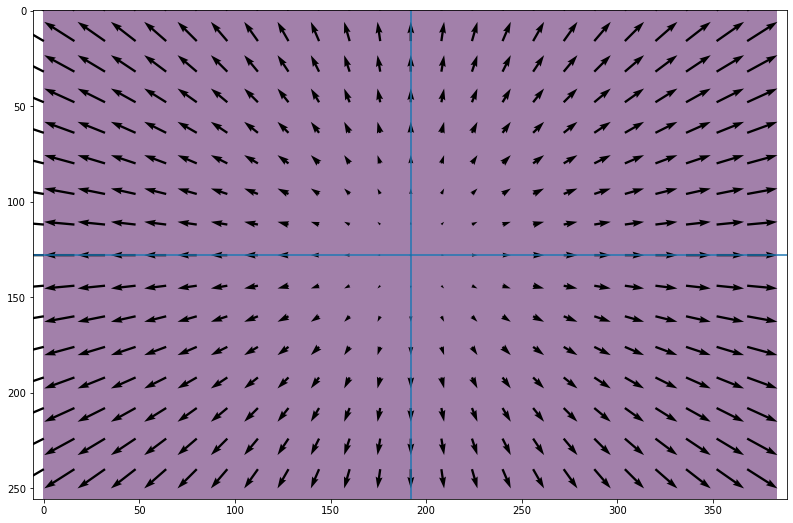

In [7]:
# part iii
# pure translation
# use Z1 as background
t3 = [0, 0, 1]
o3 = [0, 0, 0]
plot_required_part(t3, o3, Z1, fx, fy, cx, cy, szx, szy)

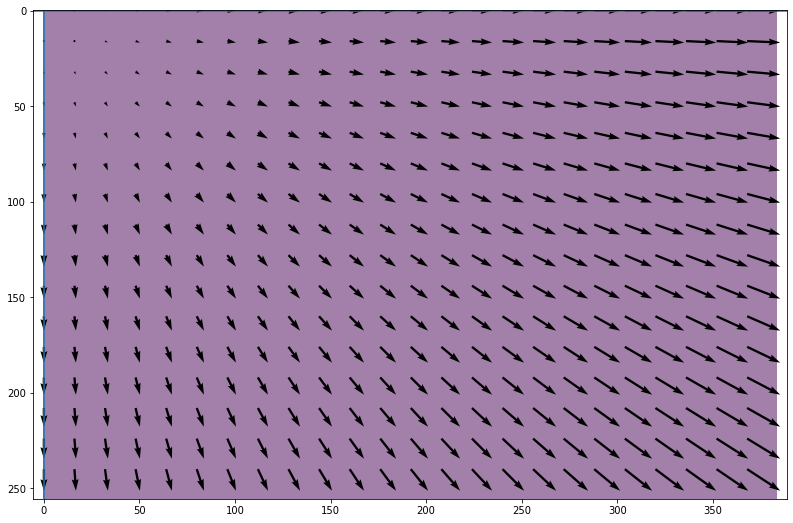

In [8]:
# part iv
# pure translation
# we have both x, y, z translation velocity
t4 = [0, 0, 1]
o4 = [0, 0, 0]
plot_required_part(t4, o4, Z1, fx, fy, 0, 0, szx, szy)

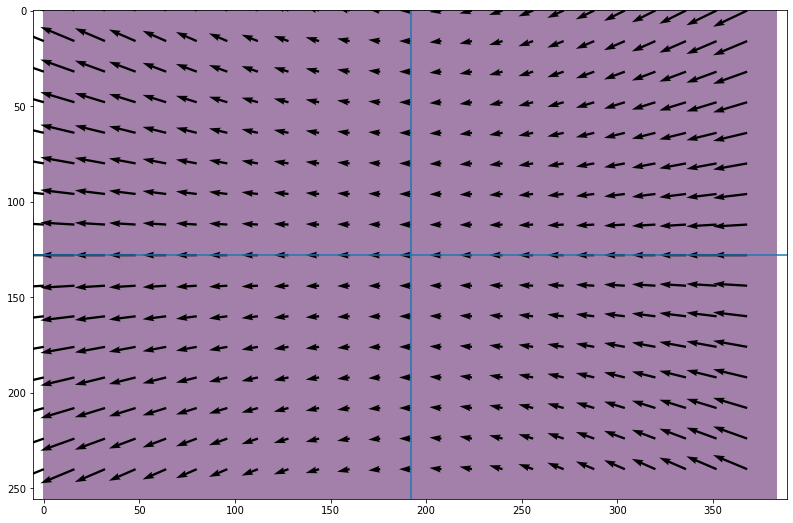

In [11]:
# part v
# pure rotation
# t = 0, omega = [0, 1, 0]
t5 = [0, 0, 0]
o5 = [0, 1, 0]
plot_required_part(t5, o5, Z1, fx, fy, cx, cy, szx, szy)